In [2]:
import numpy as np
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

inputs=[0,2,-1,3.3,-2.7,1.1,2.2,-100]
outputs=np.maximum(0,inputs)

print(outputs)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [3]:
### ACTIVATION FUNCTION: RELU
class Activation_ReLU:
    # Forward pass
    def forward(self,inputs):
        # Calculate output values from input
        self.output=np.maximum(0,inputs)


# create datasets
X,y=spiral_data(samples=100,classes=3)
#create dense layer with 2 input 

<function matplotlib.pyplot.show(close=None, block=None)>

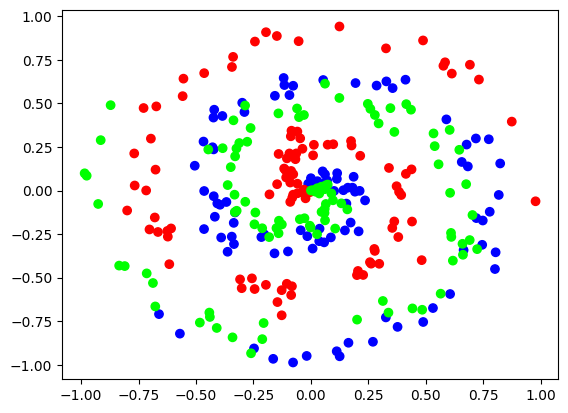

In [4]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='brg')
plt.show

In [5]:
inputs=[[1,2,3,2.5],[2,5,-1,2],[-1.5,2.7,3.3,-0.8]]


## Get unnormalized probabilities
exp_values=np.exp(inputs-np.max(inputs,axis=1,keepdims=True))
## Normalize them for each sample
probablitiles=exp_values/np.sum(exp_values,axis=1,keepdims=True)
print(probablitiles)
np.sum(probablitiles,axis=1) # u can see that the probabilitues sum to 1.


[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]
 [0.00522984 0.34875873 0.63547983 0.0105316 ]]


array([1., 1., 1.])

In [6]:
#Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # get unnormalised probabilities
        exp_values=np.exp(inputs-np.max(inputs,axis=1,keepdims=True))
        # Normalise them for each sample
        probablitiles=exp_values/np.sum(exp_values,axis=1,keepdims=True)
        self.output=probablitiles

In [7]:
class Layer_Dense:
    # Layer initialization
    def __init__(self,n_inputs,n_neurons):
        # Initialize weights an biases
        self.weights=0.01*np.random.randn(n_inputs,n_neurons)
        self.biases=np.zeros((1,n_neurons))
        

    ## Forward pass
    def forward(self, inputs):
        ### Calculate output values from inputs, weights and biases
        self.output=np.dot(inputs,self.weights)+self.biases


In [8]:
### NEURAL NETWORK FORWARD PASS (with NO LOSS)

# Create dataset
X,y=spiral_data(samples=100,classes=3)
# create dense layer with 2 input features and 3 output values
dense1=Layer_Dense(2,3)
# create Relu activation
activation1=Activation_ReLU()

#Create second dense layer with 3 input features
dense2=Layer_Dense(3,3) # 3-inputs and 3-neurons
activation2=Activation_Softmax()

# make a forward pass of our training data through this layer
dense1.forward(X) # generate outputs from 1st layer of neuron

## Make  a forward pass through activation function
#it takes output of first dense layer here
activation1.forward(dense1.output)
# forward pass through second dense layer
# it takes output of activation function of first layer as inputs
dense2.forward(activation1.output) # use output of previous activation as input
## Make  a forward pass through activation function
#it takes output of second dense layer here
activation2.forward(dense2.output)
# lets see output of first few samples:
print(activation2.output[:5])

[[0.33333333 0.33333333 0.33333333]
 [0.33333355 0.33333342 0.33333303]
 [0.33333336 0.33333345 0.33333319]
 [0.33333338 0.33333352 0.3333331 ]
 [0.33333339 0.33333351 0.3333331 ]]
